# LBP LOG+trunc method with Rough Sets

In [15]:
import tables
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import roughsets_base

# Load PATH variable
with open("config.json", "r") as file:
    config = json.load(file)
DATASETS = config["paths"]["DATASETS"]
DATABASES = config["paths"]["DATABASES"]

## Load HDF5 Dataset

In [16]:
nome = "lbp_bimcv|radius=6|n_points=48|n_samples=10192.hdf5"
dataset = os.path.join(DATASETS, nome)

hdf5 = tables.open_file(dataset)
dataset_table = hdf5.get_node("/dataset")
data = dataset_table.col("descriptor")
labels = dataset_table.col("label")
hdf5.close()

print(f"Greatest value: {np.max(data)},\nLowest value: {np.min(data)}")

Greatest value: 13599977.0,
Lowest value: 0.0


# Histograms

### LBP histogram

<function matplotlib.pyplot.show(close=None, block=None)>

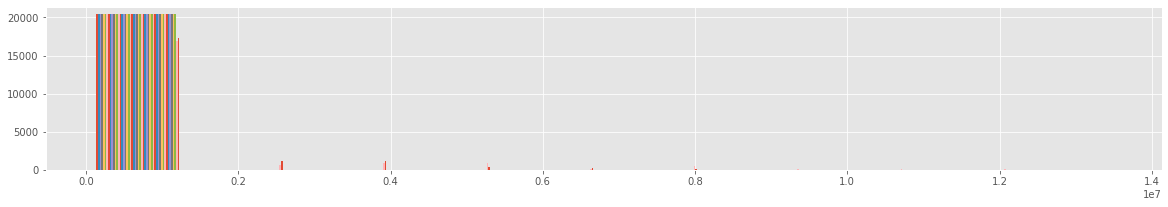

In [17]:
plt.figure(figsize=(20,3))
plt.style.use('ggplot')
plt.hist(data)
plt.show

### LBP's LOG histogram

<function matplotlib.pyplot.show(close=None, block=None)>

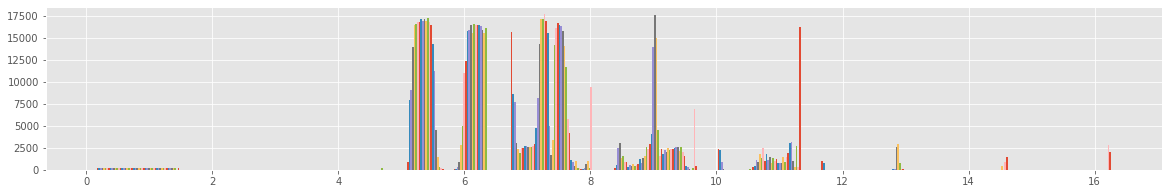

In [18]:
data_log = np.log(data + 1)
plt.figure(figsize=(20,3))
plt.style.use('ggplot')
plt.hist(data_log)
plt.show

### Rough Sets
Truncando os valores do data_log

In [19]:
#df = pd.DataFrame(data_log)
df = pd.DataFrame(np.trunc(data_log).astype(int))
labels_old = labels
labels = pd.Series(labels)
labels.name = "decision"
rs=roughsets_base.RoughSetDT(X=df,y=labels)
positive_region, boundary, upper_aprox, negative_region = rs.get_approximation_indices()
boundary_list = boundary.to_list()
display(df,labels)
print("Boundary Region:")
display(boundary_list,len(boundary_list))


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,7,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,7,10
1,7,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,7,10
2,7,6,6,6,6,5,5,5,5,5,...,6,6,6,6,5,6,6,5,8,10
3,7,6,6,6,5,5,5,5,5,5,...,5,5,5,5,5,6,6,6,7,10
4,7,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20379,7,6,6,6,6,5,5,5,5,5,...,6,6,6,6,6,6,6,6,7,10
20380,6,6,6,6,6,6,5,5,5,5,...,6,6,6,6,6,6,6,5,7,10
20381,6,6,6,6,6,5,5,5,5,5,...,6,5,6,5,5,5,5,5,8,10
20382,7,6,6,6,6,6,5,5,5,6,...,6,6,6,6,6,6,6,5,7,10


0         b'COVID'
1         b'COVID'
2         b'COVID'
3         b'COVID'
4         b'COVID'
           ...    
20379    b'NORMAL'
20380    b'NORMAL'
20381    b'NORMAL'
20382    b'NORMAL'
20383    b'NORMAL'
Name: decision, Length: 20384, dtype: bytes128

Boundary Region:


Int64Index([    6,    11,    13,    17,    25,    30,    34,    40,    42,
               60,
            ...
            20310, 20318, 20320, 20325, 20330, 20357, 20365, 20366, 20370,
            20379],
           dtype='int64', length=1829)

1829

# 3 way decision

In [ ]:
for i in boundary_list:
    labels[i] = "BND"

## Save HDF5 file

In [20]:
print("Feature Vectors")
data_log_np = np.trunc(data_log).astype(int)
display(data_log_np)
file = tables.open_file(os.path.join(DATASETS,f"log_{nome}"), mode='w')

table_desc = {
    'descriptor': tables.Int32Col(shape=data_log_np.shape[1]),
    'label': tables.StringCol(10)
}

tabela = file.create_table('/','dataset', table_desc)

for i in range(len(data_log_np)):
    linha = tabela.row
    linha['descriptor'] = data_log_np[i]
    linha['label'] = labels[i]
    linha.append()

tabela.flush()
file.close()
print("Done!")

Feature Vectors


array([[ 7,  6,  6, ...,  6,  7, 10],
       [ 7,  6,  6, ...,  6,  7, 10],
       [ 7,  6,  6, ...,  5,  8, 10],
       ...,
       [ 6,  6,  6, ...,  5,  8, 10],
       [ 7,  6,  6, ...,  5,  7, 10],
       [ 7,  6,  6, ...,  5,  9, 10]])

Done!
